In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

In [3]:
pip install scikit-learn


In [4]:
pip install -U scikit-learn

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [7]:
# data collection and analysis

In [8]:
#loading the data from csv file to a pandas Dataframe 
insurance_dataset=pd.read_csv("C:/insurance.csv")

In [9]:
#first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#number of rows and columns
insurance_dataset.shape

(1338, 7)

In [11]:
print("Number of Rows",insurance_dataset.shape[0])
print("Number of Columns",insurance_dataset.shape[1])

Number of Rows 1338
Number of Columns 7


In [12]:
#getting the information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
#categorical features:
#1)sex
#2)smoker
#3)region


In [14]:
#checking for missing values 
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#data analysis

In [16]:
#statistical measures of dataset
insurance_dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


C:\Users\Supritha\AppData\Local\Temp\ipykernel_12448\1258995000.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


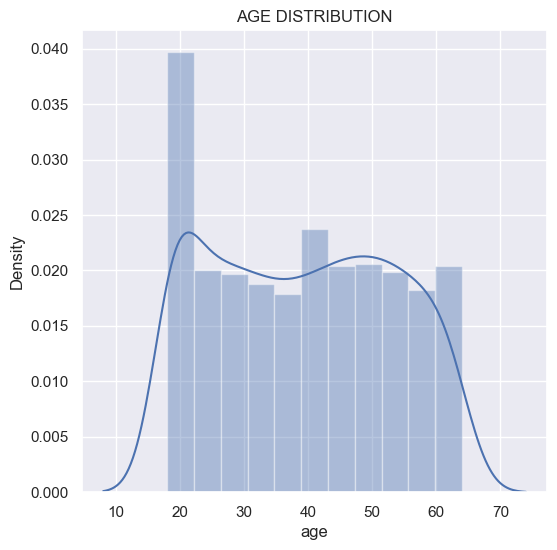

In [17]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('AGE DISTRIBUTION')
plt.show()

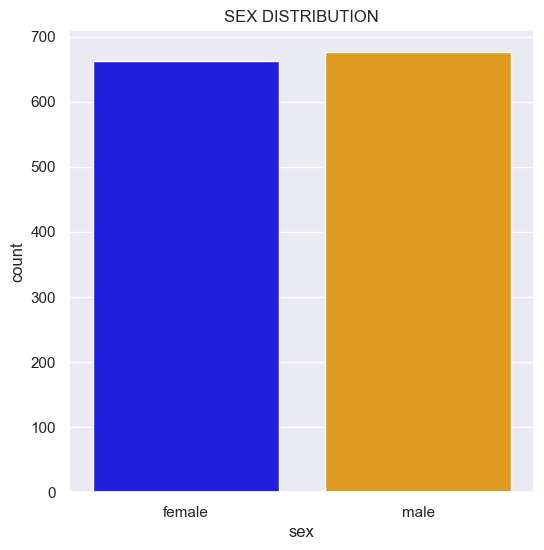

In [18]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset,hue='sex',palette={'male': 'orange', 'female': 'blue'})
plt.title('SEX DISTRIBUTION')
plt.show()

In [19]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\Supritha\AppData\Local\Temp\ipykernel_12448\85856770.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


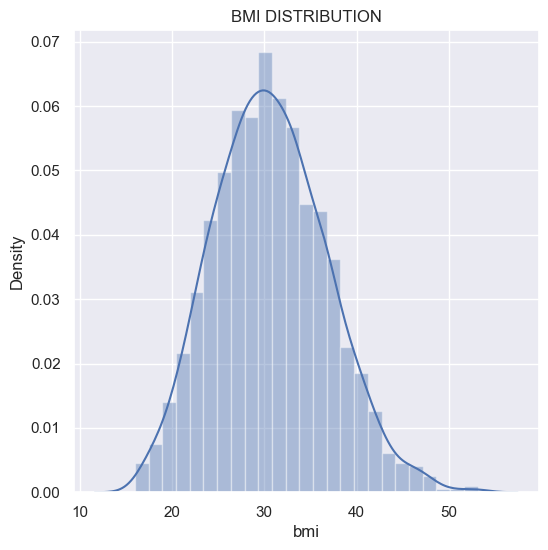

In [20]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI DISTRIBUTION')
plt.show()

In [21]:
#--normal BMI range-->18.5 to 24.9(in plot lot of people are overweight)

C:\Users\Supritha\AppData\Local\Temp\ipykernel_12448\2679045156.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children',data=insurance_dataset, palette='Set1')


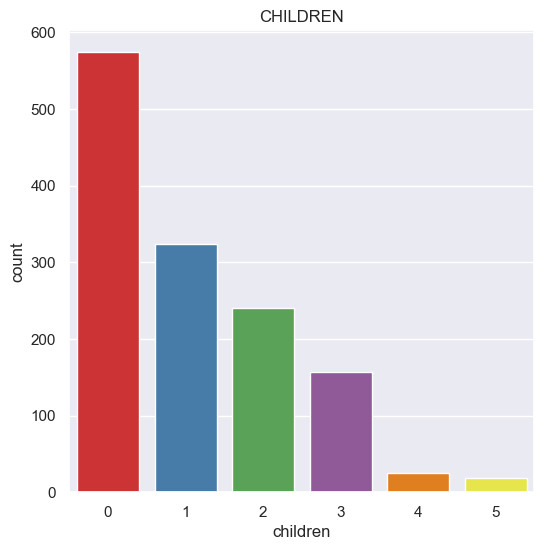

In [22]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset, palette='Set1')
plt.title('CHILDREN')
plt.show()

In [23]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

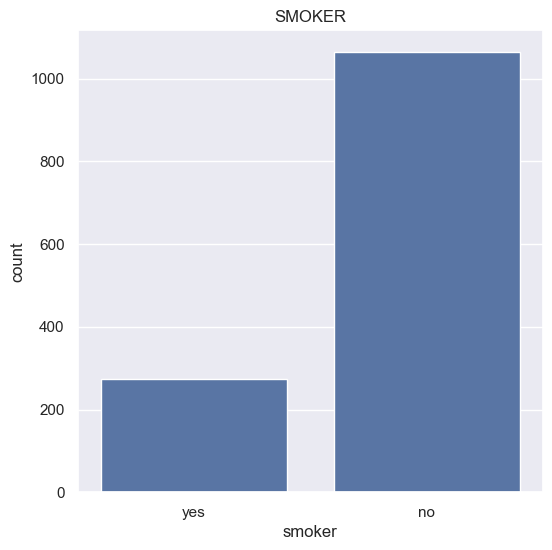

In [24]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('SMOKER')
plt.show()

In [25]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

C:\Users\Supritha\AppData\Local\Temp\ipykernel_12448\234350057.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',data=insurance_dataset, palette='Set2')


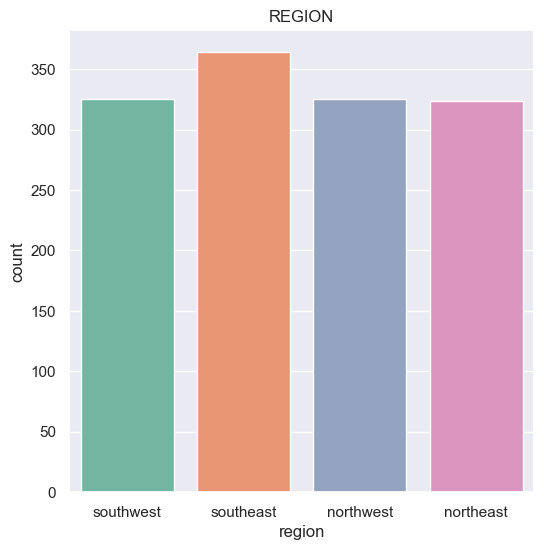

In [26]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset, palette='Set2')
plt.title('REGION')
plt.show()

In [27]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\Supritha\AppData\Local\Temp\ipykernel_12448\3644968428.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


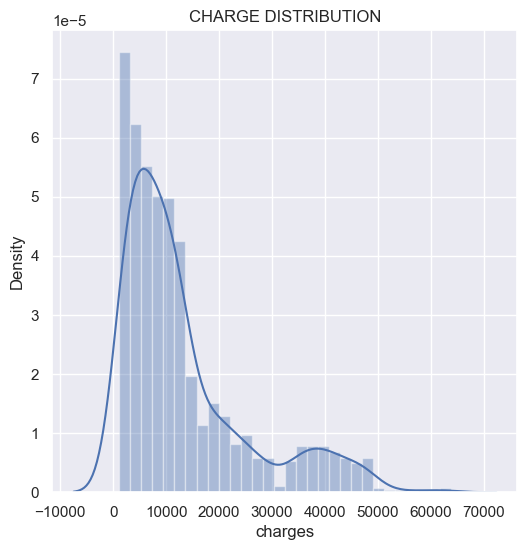

In [28]:
#distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('CHARGE DISTRIBUTION')
plt.show()

In [29]:
#DATA PREPROCESSING

In [30]:
#encoding the categorical features

In [31]:
insurance_dataset['sex'].unique()
insurance_dataset['sex']=insurance_dataset['sex'].map({'female':0,'male':1})
insurance_dataset['smoker']=insurance_dataset['smoker'].map({'yes':1,'no':0})
insurance_dataset['region']=insurance_dataset['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

In [32]:
# #encoding sex column
# insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# #encoding smoker column
# insurance_dataset.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

# #encoding region column
# insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [33]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [34]:
#splitting the features and target

In [35]:
x=insurance_dataset.drop(columns='charges',axis='1')
y=insurance_dataset['charges']


In [36]:
# print(x)

In [37]:
# print(y)

In [38]:
# x = insurance_dataset.drop(columns='charges')
# y = insurance_dataset['charges']

In [39]:
#splitting the data into traning data and testing data

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [41]:
# print(x.shape,x_train.shape,x_test.shape)

In [42]:
# model training

In [43]:
#linear regression

In [44]:
#loading linear regression model
# regressor = LinearRegression()

In [45]:
# regressor.fit(x_train,y_train)

In [46]:
#prediction on traning data 
# training_data_prediction=regressor.predict(x_train) 

In [47]:
# R squared value
# r2_train = metrics.r2_score(y_train, training_data_prediction)
# print('R squared value :' ,r2_train)

In [48]:
#prediction on testing data 
# test_data_prediction=regressor.predict(x_test) 

In [49]:
# R squared value
# r2_test = metrics.r2_score(y_test, test_data_prediction)
# print('R squared value :' ,r2_test)

In [50]:
# from sklearn.linear_model import LinearRegression
# from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor

In [51]:
# lr = LinearRegression()
# lr.fit(x_train,y_train)
# svm = SVR()
# svm.fit(x_train,y_train)
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
# gr = GradientBoostingRegressor()
# gr.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
y_pred3 = rf.predict(x_test)


df1 = pd.DataFrame({'Actual':y_test,'rf':y_pred3})

In [53]:
df1

,Actual,rf
764,9095.06825,11780.385168
887,5272.17580,5696.982037
890,29330.98315,28312.334651
1293,9301.89355,10680.861691
259,33750.29180,34332.029930
...,...,...
109,47055.53210,46988.906957
575,12222.89830,13185.747408
535,6067.12675,6455.354776
543,63770.42801,46796.125262


In [53]:
import matplotlib.pyplot as plt

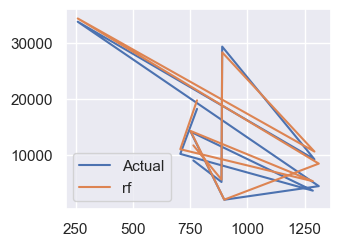

In [54]:
# plt.subplot(221)
# plt.plot(df1['Actual'].iloc[0:11],label='Actual')
# plt.plot(df1['Lr'].iloc[0:11],label="Lr")
# plt.legend()

# plt.subplot(222)
# plt.plot(df1['Actual'].iloc[0:11],label='Actual')
# plt.plot(df1['svm'].iloc[0:11],label="svr")
# plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

# plt.subplot(224)
# plt.plot(df1['Actual'].iloc[0:11],label='Actual')
# plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [57]:
# from sklearn import metrics


In [58]:
# score1 = metrics.r2_score(y_test,y_pred1)
# score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
# score4 = metrics.r2_score(y_test,y_pred4)

In [60]:
print(score3)

0.8625226089309584


In [61]:
# s1 = metrics.mean_absolute_error(y_test,y_pred1)
# s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
# s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [63]:
print(s3)

2481.7843223514933


In [64]:
#predict the charges for new customer

In [65]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [66]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [67]:
new_pred = rf.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42945.40794159999


In [68]:


#From above we found that gredianBoostingRegressor is the best model for this dataset. Before production, it is good practice to train our model on the entire dataset.

In [70]:
# gr = GradientBoostingRegressor()
# gr.fit(x,y)

In [71]:
# new_pred = gr.predict(df)
# print("Medical Insurance cost for New Customer is : ",new_pred[0])

In [72]:
#building a predictive system

In [73]:
# input_data=(32,0,28.1,4,0,2)

# #changing input_data to numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# #reshape the array
# input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

# prediction = regressor.predict(input_data_reshape)
# print('the insurance cost is',prediction[0])

In [74]:

import pickle
from sklearn.ensemble import RandomForestRegressor

# After training the models
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Repeat similarly for other models (lr, svm, gr)


In [75]:
pip install --upgrade flask

Note: you may need to restart the kernel to use updated packages.


In [76]:
import flask
print(flask.__version__)


3.0.3


C:\Users\Supritha\AppData\Local\Temp\ipykernel_12448\2000271723.py:2: DeprecationWarning: The '__version__' attribute is deprecated and will be removed in Flask 3.1. Use feature detection or 'importlib.metadata.version("flask")' instead.
  print(flask.__version__)
